In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from selenium import webdriver
from bs4 import BeautifulSoup as bs
import pickle
import seaborn as sns
import time
import numpy as np

In [2]:
# get playlist information
def get_playlist(playlist_id,token):
    """Take ids and retrieve audio features for them as a list"""
    track_features = []
    url = '	https://api.spotify.com/v1/playlists/'
    access_token = token
    url_params = playlist_id
    headers = {'Authorization': 'Bearer '+access_token}
    response=requests.get(url+url_params,headers = headers)
    return response.json()
# get playlist track information
def get_playlist_tracks(playlist_id,token):
    """Take ids and retrieve audio features for them as a list"""
    track_features = []
    url = f'https://api.spotify.com/v1/playlists/{playlist_id}/tracks'
    access_token = token
    headers = {'Authorization': 'Bearer '+access_token}
    response=requests.get(url,headers = headers)
    return response.json() 
# get the track features
def get_track_features(track_ids,token):
    """Take list of track ids and retrieve audio features for them as a list"""
    track_features = []
    url = 'https://api.spotify.com/v1/audio-features/?ids='
    access_token = token
    url_params = '%2C'.join(track_ids)
    headers = {'Authorization': 'Bearer '+access_token}
    response=requests.get(url+url_params,headers = headers)
    track_features.append(response.json())
    return track_features 

In [5]:
# examples of access tokens from Spotify, you'll have to grab your own to update the data
playlist_token='BQAGGYFbeNIdBVGxh5mhGgrxHxJtw0ssA75MPdDHHOpIhFKbY2c4utzmp3d56vvOLehwIvFU3TKqFUovzxGoMWXgI788_7CWfoiG3G3'
playlist_track_token='BQAx852efTaZGJ0p6tDr7OJnfRM7lhVv55w_7i2CrAbcxoSdsPPNajcvU8Oe1icEBeAqpgVY63hp6xMiqjX2FVlL_SnYIgzEppijiW8lcJFnb3KAFI5fGa5SV3ZEsmP5Y5cF7pTAAru7r7qZ1Vl_jaA-'
features_token='BQCBZ9v4Sst7A01X13CjowqQSkfeSqqoOElFrOxfhqrHM3XeYtsq-vLZsOdX_x_fDgYFrej946jEhTDTbrgSq71Q-W7qGrPYjWong7bJwKHbmT0eiXnd74Yh5dZHK65p3h3cYGybevWcaFFVY2eUp8wU'

In [9]:
# find playlist tracks, i've passed Spotify's uri for the ones I chose as my samples
metal_playlist=get_playlist('2p3L8b22Bpff0oqjABt6e4',playlist_track_token)
metal_tracks=get_playlist_tracks('2p3L8b22Bpff0oqjABt6e4',playlist_track_token)
pop_playlist=get_playlist('3ZgmfR6lsnCwdffZUan8EA',playlist_track_token)
pop_tracks=get_playlist_tracks('3ZgmfR6lsnCwdffZUan8EA',playlist_track_token)
hip_playlist=get_playlist('06KmJWiQhL0XiV6QQAHsmw',playlist_track_token)
hip_tracks=get_playlist_tracks('06KmJWiQhL0XiV6QQAHsmw',playlist_track_token)
latin_playlist=get_playlist('37i9dQZF1DX10zKzsJ2jva',playlist_track_token)
latin_tracks=get_playlist_tracks('37i9dQZF1DX10zKzsJ2jva',playlist_track_token)

In [3]:
# breaks apart the jsons from above to get just the parts i'm interested in
def create_df(playlist):
    playlist_json={
        'followers': playlist['followers']['total'],
        'name': playlist['name']
    }
    tracks={}
    for count,track in enumerate(playlist['tracks']['items']):
        tracks[track['track']['id']]={}
        tracks[track['track']['id']]['artist']=track['track']['artists'][0]['name']
        tracks[track['track']['id']]['name']=track['track']['name']
        tracks[track['track']['id']]['popularity']=track['track']['popularity']
        tracks[track['track']['id']]['preview_url']=track['track']['preview_url']
        tracks[track['track']['id']]['position']=count+1
        tracks[track['track']['id']]['explicit']=track['track']['explicit']
        tracks[track['track']['id']]['playlist']=playlist['name']
    return playlist_json, tracks

In [88]:
# takes the jsons for playlist information and for track ids and returns a dataframe for playlist and track info
metal_json, metal_tracks_json=create_df(metal_playlist)
pop_json, pop_tracks_json=create_df(pop_playlist)
hip_json, hip_tracks_json=create_df(hip_playlist)
latin_json, latin_tracks_json=create_df(latin_playlist)

In [163]:
# puts the track information dataframes together
list_df=pd.DataFrame(metal_tracks_json).T
list_df=pd.concat([list_df,pd.DataFrame(pop_tracks_json).T])
list_df=pd.concat([list_df,pd.DataFrame(hip_tracks_json).T])
list_df=pd.concat([list_df,pd.DataFrame(latin_tracks_json).T])

In [110]:
# uses the track ids from above and fetches the track features into json files
metal_features=get_track_features(metal_tracks_json.keys(),features_token)
pop_features=get_track_features(pop_tracks_json.keys(),features_token)
hip_features=get_track_features(hip_tracks_json.keys(),features_token)
latin_features=get_track_features(latin_tracks_json.keys(),features_token)

In [4]:
# creates a dataframe for the track features that we are interested in from the jsons above
def create_track_df(features):
    playlist={}
    for track in features[0]['audio_features']:
        playlist[track['id']]={}
        for key,value in track.items():
            playlist[track['id']][key]=value
    return playlist

In [144]:
metal_features_dict=create_track_df(metal_features)
pop_features_dict=create_track_df(pop_features)
hip_features_dict=create_track_df(hip_features)
latin_features_dict=create_track_df(latin_features)

In [147]:
metal_df=pd.DataFrame(metal_features_dict).T
pop_df=pd.DataFrame(pop_features_dict).T
hip_df=pd.DataFrame(hip_features_dict).T
latin_df=pd.DataFrame(latin_features_dict).T

In [149]:
# puts the above information together
tracks_df=pd.concat([metal_df,pop_df])
tracks_df=pd.concat([tracks_df,hip_df])
tracks_df=pd.concat([tracks_df,latin_df])

In [3]:
# puts both playlist and track dataframes together
combined_df=tracks_df.join(list_df)

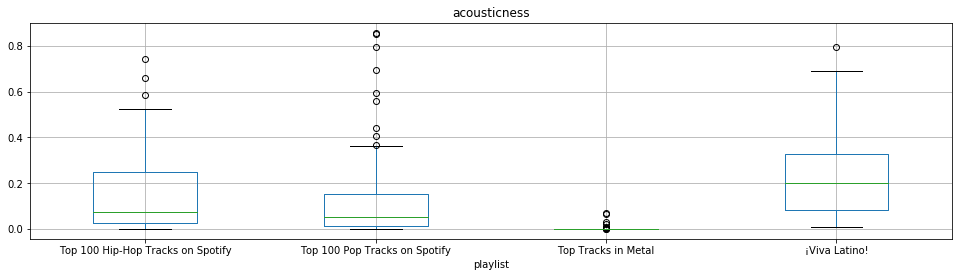

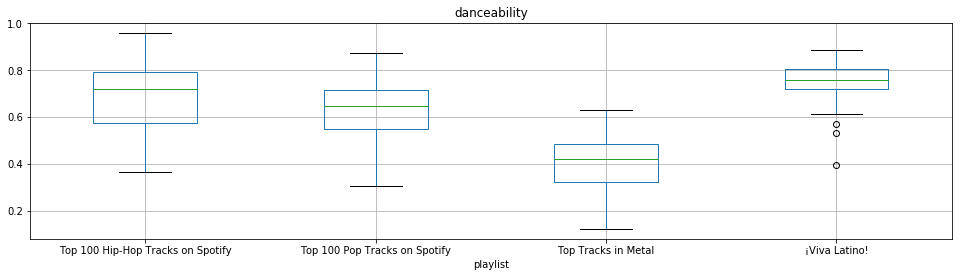

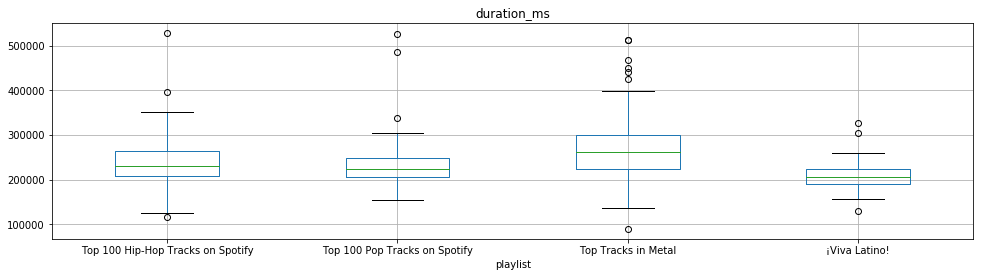

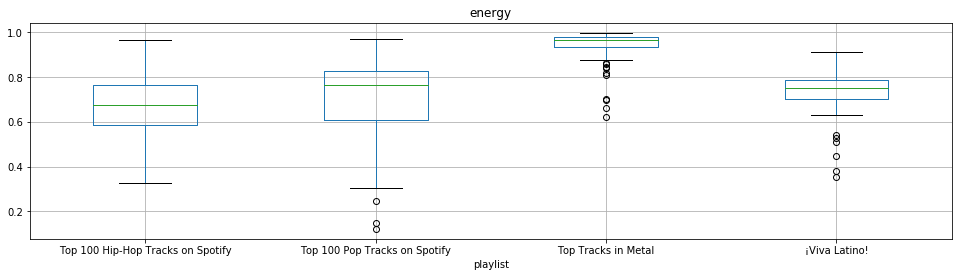

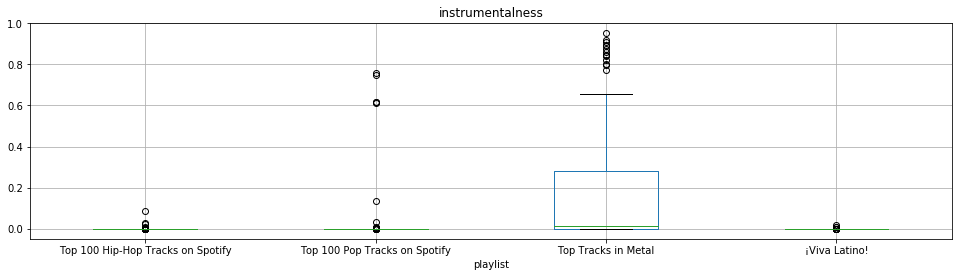

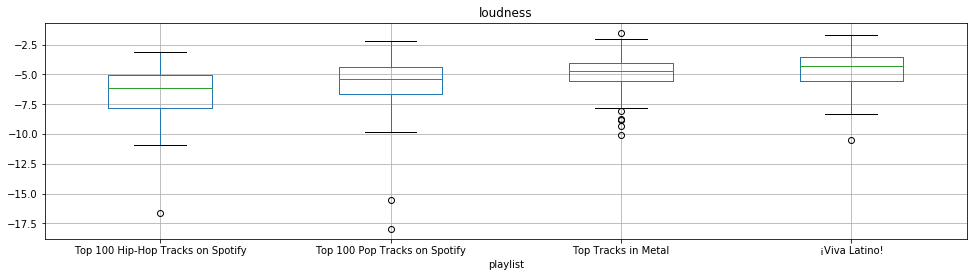

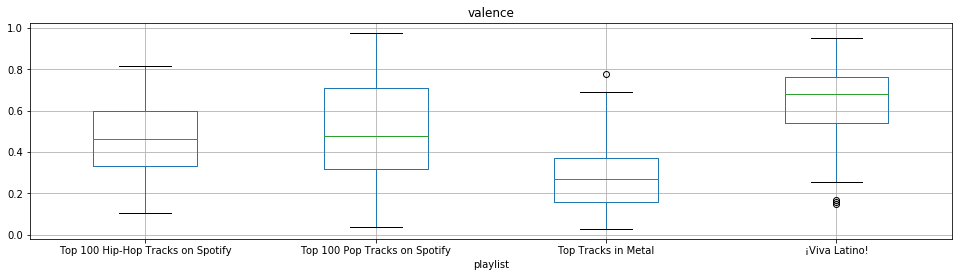

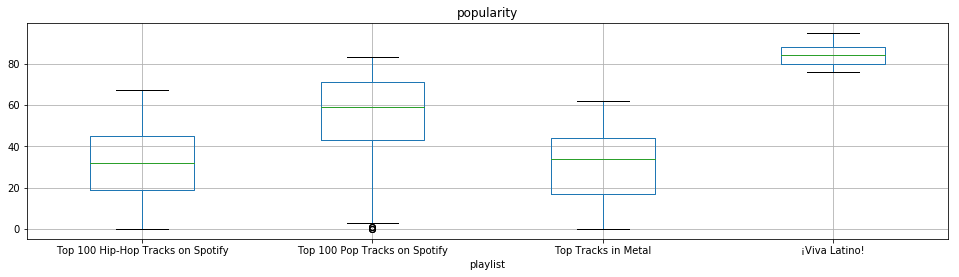

In [42]:
# plots the 5 number summaries of several interesting features
combined_df.boxplot(column=['acousticness'],by='playlist', figsize=(16,4))
plt.suptitle('')
combined_df.boxplot(column=['danceability'],by='playlist', figsize=(16,4))
plt.suptitle('')
combined_df.boxplot(column=['duration_ms'],by='playlist', figsize=(16,4))
plt.suptitle('')
combined_df.boxplot(column=['energy'],by='playlist', figsize=(16,4))
plt.suptitle('')
combined_df.boxplot(column=['instrumentalness'],by='playlist', figsize=(16,4))
plt.suptitle('')
combined_df.boxplot(column=['loudness'],by='playlist', figsize=(16,4))
plt.suptitle('')
combined_df.boxplot(column=['valence'],by='playlist', figsize=(16,4))
plt.suptitle('')
combined_df.boxplot(column=['popularity'],by='playlist', figsize=(16,4))
plt.suptitle('');
plt.savefig('5_num_summaries.png')

In [6]:
def get_lyrics(name):
    '''
    This scrapes genius for a given artist and track name, 
    it will go to the search bar, enter the string and go to the first search result
    '''
    chrome_exe = '/Users/flatironschool/Downloads/chromedriver'
    driver=webdriver.Chrome(chrome_exe)
    url = 'https://genius.com/'
    # tries to find the lyrics for the given track and if an error occurs returns 'None'
    try:
        driver.get(url)
        search=driver.find_elements_by_class_name('quick_search')[0]
        search.click()
        search.send_keys(name)
        time.sleep(1)
        result=driver.find_elements_by_xpath("//search-result-item/div/mini-song-card/a")
        driver.get(result[0].get_attribute('href'))
        time.sleep(1)
        lyric_div=driver.find_element_by_tag_name('lyrics')
        lyric_section=driver.find_element_by_tag_name('section')
        lyric=driver.find_element_by_tag_name('p')
        lyrics=lyric.text
        driver.close()
    except:
        driver.close()
        return 'None'
    return lyrics

In [208]:
# puts artist name and track name together for the scraper
combined_df['combined_name']=combined_df['artist']+" "+combined_df['name']

In [212]:
# applies the above function to the track id column to be saved into a new column
combined_df['lyrics']=combined_df['combined_name'].apply(get_lyrics)

In [2]:
df=combined_df

In [3]:
# modules and libraries i used for the WordClouds
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
from os import path
from PIL import Image
from nltk.corpus import stopwords

In [5]:
def clean_text(text):
    try:
        soup=bs(text,'html.parser')
        cleaned=bs(re.sub(r"\[.*?\]",'',soup.text))
        words=cleaned.p.text.split()
        for word in words:
            word=word.strip(' ?,.!"''{{}}(())')
        return words
    except:
        return ['']

In [6]:
df['cleaned']=df['lyrics'].map(clean_text)

In [7]:
genre_df=df.groupby('playlist').cleaned.apply(lambda x: x.sum())

In [8]:
genre_df=pd.DataFrame(genre_df)

In [29]:
def generate_cloud(text):
    stop_words = set(STOPWORDS)
    stop_words.update(stopwords.words('english'),stopwords.words('spanish'),'de','dé','eh','oh')
    wordcloud=WordCloud(stopwords=stop_words,
                        background_color="white", max_words=100, mask=metal_mask,
                contour_width=3, contour_color='black').generate(' '.join(text))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

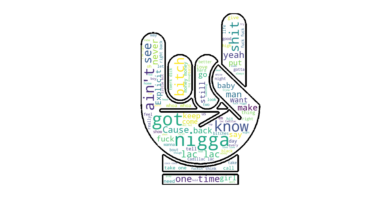

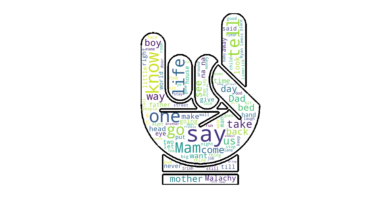

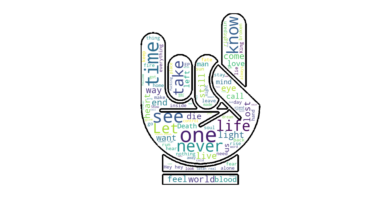

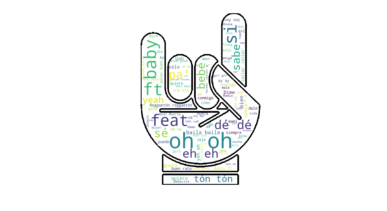

playlist
Top 100 Hip-Hop Tracks on Spotify    None
Top 100 Pop Tracks on Spotify        None
Top Tracks in Metal                  None
¡Viva Latino!                        None
Name: cleaned, dtype: object

In [30]:
genre_df['cleaned'].apply(generate_cloud)